# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import math
import pandas as pd
import datetime as dt
from scipy import stats
from pandas.plotting import autocorrelation_plot
sns.set()

In [ ]:
data_sheet1 = pd.read_excel("Retail_Sales.xlsx",sheet_name='Year 2009-2010')
data_sheet2 = pd.read_excel("Retail_Sales.xlsx",sheet_name='Year 2010-2011')

In [ ]:
data_sheet1.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [ ]:
data_sheet2.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [ ]:
data_sheet1.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
data_sheet2.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
data_sheet1.info

<bound method DataFrame.info of        Invoice StockCode  ... Customer ID         Country
0       489434     85048  ...     13085.0  United Kingdom
1       489434    79323P  ...     13085.0  United Kingdom
2       489434    79323W  ...     13085.0  United Kingdom
3       489434     22041  ...     13085.0  United Kingdom
4       489434     21232  ...     13085.0  United Kingdom
...        ...       ...  ...         ...             ...
525456  538171     22271  ...     17530.0  United Kingdom
525457  538171     22750  ...     17530.0  United Kingdom
525458  538171     22751  ...     17530.0  United Kingdom
525459  538171     20970  ...     17530.0  United Kingdom
525460  538171     21931  ...     17530.0  United Kingdom

[525461 rows x 8 columns]>

In [ ]:
data_sheet2.info

<bound method DataFrame.info of        Invoice StockCode  ... Customer ID         Country
0       536365    85123A  ...     17850.0  United Kingdom
1       536365     71053  ...     17850.0  United Kingdom
2       536365    84406B  ...     17850.0  United Kingdom
3       536365    84029G  ...     17850.0  United Kingdom
4       536365    84029E  ...     17850.0  United Kingdom
...        ...       ...  ...         ...             ...
541905  581587     22899  ...     12680.0          France
541906  581587     23254  ...     12680.0          France
541907  581587     23255  ...     12680.0          France
541908  581587     22138  ...     12680.0          France
541909  581587      POST  ...     12680.0          France

[541910 rows x 8 columns]>

In [ ]:
# Merging both sheets to get a single dataframe
dataframe = pd.concat([data_sheet1, data_sheet2], ignore_index=True, sort=False)

In [ ]:
dataframe.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
dataframe.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
dataframe

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Checking if the Sale is made on Weekend or Weekday

In [ ]:
dataframe["DayOfMonth"] = (dataframe["InvoiceDate"]).dt.day
dataframe["IsWeekend"] = (dataframe['InvoiceDate'].dt.dayofweek >= 5).astype(int)
dataframe.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DayOfMonth,IsWeekend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,0


In [ ]:
#Cehcking the distribution of 'IsWeekend' column
dataframe.IsWeekend.value_counts()

0    927713
1    139658
Name: IsWeekend, dtype: int64

In [ ]:
dataframe['BillValue'] = dataframe['Price'] * dataframe['Quantity']
dataframe

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DayOfMonth,IsWeekend,BillValue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,0,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,0,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,0,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,0,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,0,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,9,0,14.85


In [ ]:
#checking for negative values in 'Price'
(dataframe.Price <0).value_counts()

False    1067366
True           5
Name: Price, dtype: int64

In [ ]:
#removing the '-' sign from values 
dataframe.Price = dataframe.Price.astype(str).str.replace('-', '').astype(float)
(dataframe.Price<0).value_counts()

False    1067371
Name: Price, dtype: int64

In [ ]:
#checking for negative value in 'Quantity
(dataframe.Quantity <0).value_counts()

False    1044421
True       22950
Name: Quantity, dtype: int64

In [ ]:
#changing the column values to absolute, removing any negative vlaues
dataframe.Quantity = dataframe.Quantity.abs()
(dataframe.Quantity <0).value_counts()

False    1067371
Name: Quantity, dtype: int64

In [ ]:
dataframe[dataframe.duplicated('StockCode', keep=False)].groupby('StockCode')['Description'].apply(list).reset_index()

,StockCode,Description
0,10002,"[INFLATABLE POLITICAL GLOBE , INFLATABLE POLIT..."
1,10080,"[GROOVY CACTUS INFLATABLE, GROOVY CACTUS INFLA..."
2,10109,"[BENDY COLOUR PENCILS, nan]"
3,10120,"[DOGGY RUBBER, DOGGY RUBBER, DOGGY RUBBER, DOG..."
4,10125,"[MINI FUNKY DESIGN TAPES, MINI FUNKY DESIGN TA..."
...,...,...
4867,gift_0001_60,"[nan, nan]"
4868,gift_0001_70,"[nan, Dotcomgiftshop Gift Voucher £70.00, nan]"
4869,gift_0001_80,"[nan, Dotcomgiftshop Gift Voucher £80.00, Dotc..."
4870,gift_0001_90,"[nan, nan]"


# EDA

## Can customers be segmented into different categories? If yes then perform analysis on the same and also propose categories. If no, then explain why?

In [ ]:
dataframe = dataframe.dropna()
dataframe.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
DayOfMonth     0
IsWeekend      0
BillValue      0
dtype: int64

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   DayOfMonth   824364 non-null  int64         
 9   IsWeekend    824364 non-null  int64         
 10  BillValue    824364 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 75.5+ MB


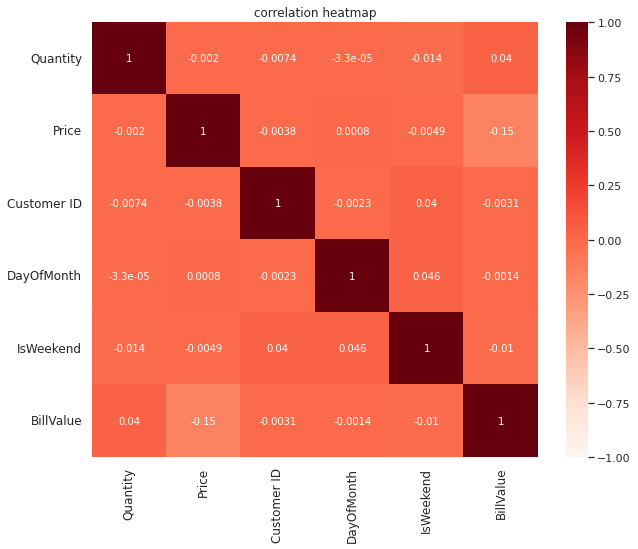

In [ ]:
plt.figure(figsize=(10,8))
s = sns.heatmap(dataframe.corr(),
               annot=True,
               cmap='Reds',
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('correlation heatmap')
plt.show()

In [ ]:
frequency_customer= dataframe.groupby(["Customer ID"]).agg({"Invoice" : "nunique"}).reset_index()
frequency_customer.columns = ['Customer ID', 'Frequency']
frequency_customer=frequency_customer.sort_values(["Frequency"], ascending=False).reset_index()
frequency_customer= frequency_customer.drop(columns=['index'])
frequency_customer['freq_score']=0
frequency_customer['freq_score'] = pd.qcut(frequency_customer['Frequency'], 4, ['1','2','3','4']).astype(int)

frequency_customer

,Customer ID,Frequency,freq_score
0,14911.0,510,4
1,12748.0,365,4
2,17841.0,289,4
3,15311.0,270,4
4,14606.0,259,4
...,...,...,...
5937,17079.0,1,1
5938,17077.0,1,1
5939,13328.0,1,1
5940,15352.0,1,1


In [ ]:
spending_customer = dataframe.groupby(["Customer ID"]).agg({"BillValue" : "sum"}).reset_index()
spending_customer.columns = ['Customer ID', 'monetary']
spending_customer = spending_customer.sort_values(["monetary"], ascending=False).reset_index()
spending_customer = spending_customer.drop(columns=['index'])
spending_customer['monetary_score']=0
spending_customer['monetary_score'] = pd.qcut(spending_customer['monetary'], 4, ['1','2','3','4']).astype(int)
spending_customer

,Customer ID,monetary,monetary_score
0,18102.0,598215.22,4
1,14646.0,523342.07,4
2,14156.0,296564.69,4
3,14911.0,270248.53,4
4,17450.0,233579.39,4
...,...,...,...
5937,16981.0,-4620.86,1
5938,15760.0,-5795.87,1
5939,15849.0,-5876.34,1
5940,12918.0,-10953.50,1


In [ ]:
customer_recency= dataframe.groupby(["Customer ID"]).agg({"InvoiceDate" : "max"}).reset_index()
customer_recency.columns = ['Customer ID', 'Recency']
customer_recency=customer_recency.sort_values(["Recency"], ascending=False).reset_index()
refrence_date = customer_recency.Recency.max() + dt.timedelta(days = 1)
customer_recency['Recency'] = (refrence_date - customer_recency.Recency).astype('timedelta64[D]')
customer_recency = customer_recency.drop(columns=['index'])
customer_recency['recency_score']=0
customer_recency['recency_score'] = pd.qcut(customer_recency['Recency'], 4, ['1','2','3','4']).astype(int)
        
customer_recency

,Customer ID,Recency,recency_score
0,12680.0,1.0,1
1,13113.0,1.0,1
2,15804.0,1.0,1
3,13777.0,1.0,1
4,17581.0,1.0,1
...,...,...,...
5937,14654.0,738.0,4
5938,17056.0,738.0,4
5939,17641.0,739.0,4
5940,17592.0,739.0,4


In [ ]:
customers = pd.merge(frequency_customer, spending_customer, on="Customer ID")
customers = pd.merge(customers, customer_recency, on="Customer ID")
customers

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score
0,14911.0,510,4,270248.53,4,1.0,1
1,12748.0,365,4,49970.13,4,1.0,1
2,17841.0,289,4,69516.19,4,2.0,1
3,15311.0,270,4,113513.07,4,1.0,1
4,14606.0,259,4,30094.38,4,1.0,1
...,...,...,...,...,...,...,...
5937,17079.0,1,1,118.80,1,78.0,2
5938,17077.0,1,1,306.00,1,578.0,4
5939,13328.0,1,1,1308.48,3,316.0,3
5940,15352.0,1,1,114.95,1,549.0,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


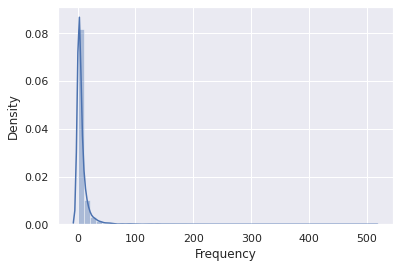

In [ ]:
sns.distplot(customers['Frequency'])
#sns.distplot((customers['monetary']))
#sns.distplot((customers['Recency']))

In [ ]:
customers.describe()

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score
count,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,7.552339,2.263548,2801.799459,2.500000,202.908617,2.492427
std,1715.451981,15.972262,1.204916,13973.922553,1.118279,211.857936,1.122909
min,12346.000000,1.000000,1.000000,-25111.090000,1.000000,1.000000,1.000000
25%,13831.250000,2.000000,1.000000,325.097500,1.250000,25.000000,1.000000
50%,15316.500000,4.000000,2.000000,843.970000,2.500000,96.000000,2.000000
75%,16801.750000,8.000000,3.000000,2182.005000,3.750000,381.000000,3.000000
max,18287.000000,510.000000,4.000000,598215.220000,4.000000,739.000000,4.000000


In [ ]:
customers['RFM'] = (customers.recency_score.astype(str)+ customers.freq_score.astype(str) + customers.monetary_score.astype(str)).astype(int)
customers = customers.sort_values(["RFM"], ascending=False).reset_index()
customers = customers.drop(columns=['index'])
customers

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score,RFM
0,12835.0,49,4,6018.67,4,418.0,4,444
1,17465.0,9,4,2533.64,4,426.0,4,444
2,15633.0,18,4,4173.41,4,509.0,4,444
3,15538.0,11,4,3027.15,4,538.0,4,444
4,14685.0,13,4,4324.31,4,576.0,4,444
...,...,...,...,...,...,...,...,...
5937,14601.0,1,1,213.96,1,11.0,1,111
5938,12702.0,1,1,219.00,1,20.0,1,111
5939,13986.0,1,1,320.46,1,17.0,1,111
5940,15318.0,1,1,312.62,1,4.0,1,111


In [ ]:
customers['monetary'].replace(0,0.001,inplace=True)

In [ ]:
(customers.monetary <0).value_counts()

False    5942
Name: monetary, dtype: int64

In [ ]:
customers.monetary = customers.monetary.astype(str).str.replace('-', '').astype(float)

In [ ]:
# data is skewed so log transform and standard scaler helps to normalize it. 
customers['recency_log'] = customers['Recency'].apply(math.log)
customers['frequency_log'] =customers['Frequency'].apply(math.log)
customers['monetary_log'] =customers['monetary'].apply(math.log)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers[['monetary_log', 'recency_log','frequency_log']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


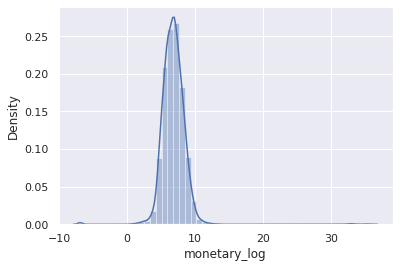

In [ ]:
sns.distplot((customers['monetary_log']))
#sns.distplot((customers['frequency_log']))
#sns.distplot((customers['recency_log']))

In [ ]:
kmeans = KMeans(n_clusters=4, init="random", n_init=10, max_iter=500,random_state=75)
kmeans.fit(scaled_features)
customers['cluster'] = kmeans.labels_
cluster_centers=kmeans.cluster_centers_

In [ ]:
customers.head(10)

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score,RFM,recency_log,frequency_log,monetary_log,cluster,rfm_cluster
0,12835.0,49,4,6018.670,4,418.0,4,444,6.035481,3.891820,8.702622,1,0
1,17465.0,9,4,2533.640,4,426.0,4,444,6.054439,2.197225,7.837412,1,0
2,15633.0,18,4,4173.410,4,509.0,4,444,6.232448,2.890372,8.336489,1,0
3,15538.0,11,4,3027.150,4,538.0,4,444,6.287859,2.397895,8.015377,1,0
4,14685.0,13,4,4324.310,4,576.0,4,444,6.356108,2.564949,8.372008,1,0
5,14590.0,28,4,2884.290,4,425.0,4,444,6.052089,3.332205,7.967034,1,0
6,15015.0,20,4,2275.820,4,501.0,4,444,6.216606,2.995732,7.730096,1,0
7,14025.0,10,4,3969.100,4,465.0,4,444,6.142037,2.302585,8.286295,1,0
8,14249.0,12,4,5625.461,4,411.0,4,444,6.018593,2.484907,8.635058,1,0
9,14134.0,15,4,11123.350,4,383.0,4,444,5.948035,2.708050,9.316802,1,0


In [ ]:
features = ['monetary',  'Recency',  'Frequency']
scaler.inverse_transform(kmeans.cluster_centers_)
data_inversed = scaler.inverse_transform(cluster_centers)
data_transformed=pd.DataFrame(np.exp(data_inversed),columns=features)
data_transformed.reset_index(inplace=True)
data_transformed.rename(columns={"index": "Cluster"},inplace=True)

      Customer ID  Frequency  freq_score  ...  monetary_log  cluster  rfm_cluster
0         12835.0         49           4  ...      8.702622        1            0
1         17465.0          9           4  ...      7.837412        1            0
2         15633.0         18           4  ...      8.336489        1            0
3         15538.0         11           4  ...      8.015377        1            0
4         14685.0         13           4  ...      8.372008        1            0
...           ...        ...         ...  ...           ...      ...          ...
5937      14601.0          1           1  ...      5.365789        2            3
5938      12702.0          1           1  ...      5.389072        2            3
5939      13986.0          1           1  ...      5.769757        2            3
5940      15318.0          1           1  ...      5.744988        2            3
5941      14703.0          1           1  ...      5.762586        2            3

[5942 rows x 13

(0.0, 70.0)

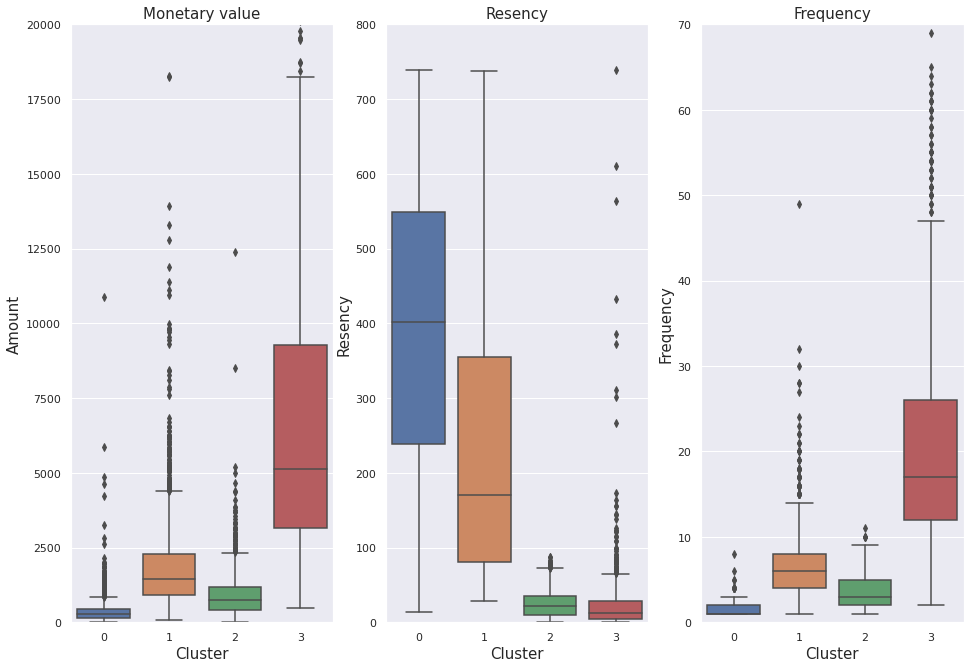

In [ ]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,11))
f1 = fig.add_subplot(131)
sns.set(font_scale =1)
ax1=sns.boxplot(x=customers['cluster'],y=customers['monetary'])
ax1.set_title('Monetary value', fontsize = 15)
ax1.set_ylabel('Amount', fontsize =15)
ax1.set_xlabel ('Cluster', fontsize = 15)
ax1.set_ylim(top=20000,bottom=0)

f1 = fig.add_subplot(132)
sns.set(font_scale = 1)
ax2=sns.boxplot(x=customers['cluster'],y=customers[ 'Recency'])
ax2.set_title('Resency', fontsize =15)
ax2.set_ylabel('Resency', fontsize =15)
ax2.set_xlabel ('Cluster', fontsize = 15)
ax2.set_ylim(top=800,bottom=0)

f1 = fig.add_subplot(133)
sns.set(font_scale = 1)
ax3=sns.boxplot(x=customers['cluster'],y=customers[ 'Frequency'])
ax3.set_title('Frequency', fontsize = 15)
ax3.set_ylabel('Frequency', fontsize =15)
ax3.set_xlabel ('Cluster', fontsize = 15)
ax3.set_ylim(top=70,bottom=0)

**Cluster 0** are low spenders, low number of orders, and recent purchase was long ago.

**Cluster 1** are promising customers. Recent Purchases but didn’t spend much.

**Cluster 2** are the high and frequent purchasers. This group buy often, buy recently and spend the most. 

**Cluster 3** made big purchases, and often, but not recently.

## How would you define a loyal customer?

In [ ]:
len(customers.RFM.unique())

63

In [ ]:
rfm_customer = customers
rfm_customer['rfm_cluster']=0
rfm_customer['rfm_cluster'] = pd.qcut(customer_recency['Recency'], 4, ['0','1','2','3']).astype(int)
rfm_customer

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score,RFM,recency_log,frequency_log,monetary_log,cluster,rfm_cluster
0,12835.0,49,4,6018.67,4,418.0,4,444,6.035481,3.891820,8.702622,0,0
1,17465.0,9,4,2533.64,4,426.0,4,444,6.054439,2.197225,7.837412,2,0
2,15633.0,18,4,4173.41,4,509.0,4,444,6.232448,2.890372,8.336489,2,0
3,15538.0,11,4,3027.15,4,538.0,4,444,6.287859,2.397895,8.015377,2,0
4,14685.0,13,4,4324.31,4,576.0,4,444,6.356108,2.564949,8.372008,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,14601.0,1,1,213.96,1,11.0,1,111,2.397895,0.000000,5.365789,3,3
5938,12702.0,1,1,219.00,1,20.0,1,111,2.995732,0.000000,5.389072,3,3
5939,13986.0,1,1,320.46,1,17.0,1,111,2.833213,0.000000,5.769757,3,3
5940,15318.0,1,1,312.62,1,4.0,1,111,1.386294,0.000000,5.744988,2,3


(0.0, 70.0)

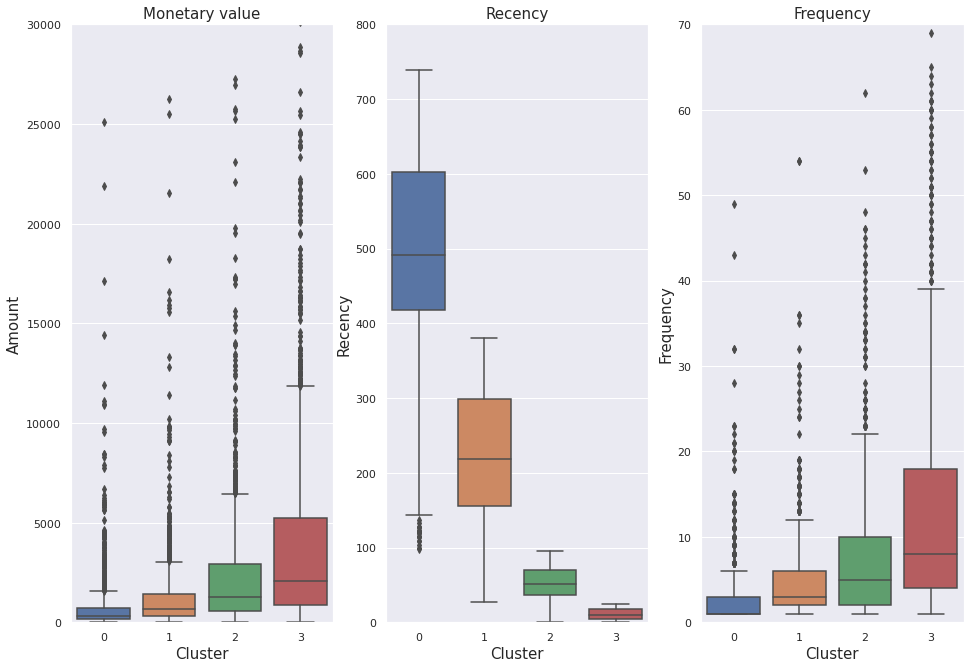

In [ ]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,11))
f1 = fig.add_subplot(131)
sns.set(font_scale =1)
ax1=sns.boxplot(x=rfm_customer['rfm_cluster'],y=rfm_customer['monetary'])
ax1.set_title('Monetary value', fontsize = 15)
ax1.set_ylabel('Amount', fontsize =15)
ax1.set_xlabel ('Cluster', fontsize = 15)
ax1.set_ylim(top=30000,bottom=0)

f1 = fig.add_subplot(132)
sns.set(font_scale = 1)
ax2=sns.boxplot(x=rfm_customer['rfm_cluster'],y=rfm_customer[ 'Recency'])
ax2.set_title('Recency', fontsize =15)
ax2.set_ylabel('Recency', fontsize =15)
ax2.set_xlabel ('Cluster', fontsize = 15)
ax2.set_ylim(top=800,bottom=0)

f1 = fig.add_subplot(133)
sns.set(font_scale = 1)
ax3=sns.boxplot(x=rfm_customer['rfm_cluster'],y=rfm_customer[ 'Frequency'])
ax3.set_title('Frequency', fontsize = 15)
ax3.set_ylabel('Frequency', fontsize =15)
ax3.set_xlabel ('Cluster', fontsize = 15)
ax3.set_ylim(top=70,bottom=0)

**Cluster 0:** Lost Customers

**Cluster 1:** Wandering Customers

**Cluster 2:** Need Based Customers

**Cluster 3:** This cluster tends to visit frequently and spends more than any other cluster, their last purchase was also not long ago. We can say these are the loyal customers

## What is the most popular time of year based on this sales data?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


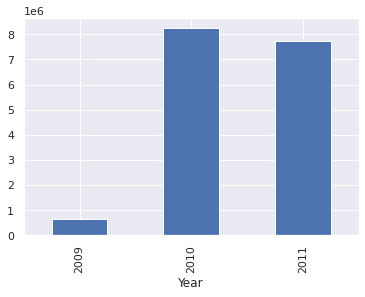

In [ ]:
df_year = dataframe
df_year["Year"] = (df_year.InvoiceDate).dt.year
df_year["Month"] = (df_year.InvoiceDate).dt.month

df_year.groupby('Year')['BillValue'].sum().plot(kind = 'bar')

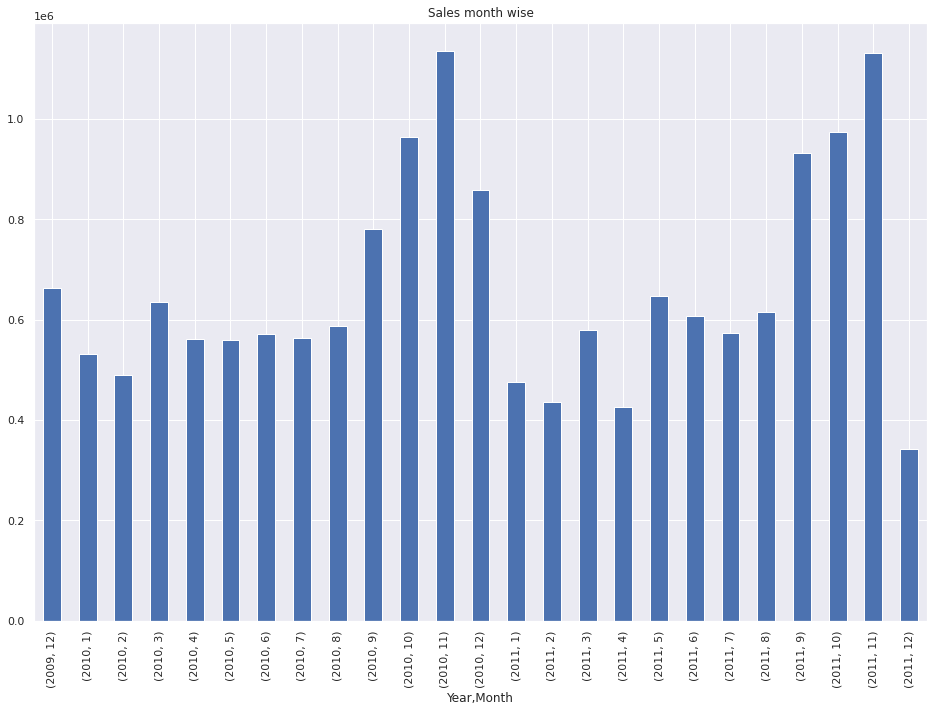

In [ ]:
df_year.groupby(['Year','Month'])['BillValue'].sum().plot(kind = 'bar', title = 'Sales month wise',figsize=(16,11))

In [ ]:
last_order_date = df_year['InvoiceDate'].max()
last_order_date

Timestamp('2011-12-09 12:50:00')

According to the stastics in above bar plot we can se September, October and November is usually the most popular time. We have high sales in 2009 december and 2010 december as well but that trend did not continue to 2011. This is beacuse we only have data till 9 December 2011.

## Discuss customer's lifetime with respect to the given dataset.

In [ ]:
data_life = dataframe

In [ ]:
data_life.InvoiceDate = pd.to_datetime(data_life.InvoiceDate).dt.date
data_life = data_life[pd.notnull(data_life['Customer ID'])]
data_life = data_life[(data_life.Quantity >0)]
data_life['Total_Sales'] = data_life.Quantity * data_life.Price
columns = ['Customer ID', 'InvoiceDate', 'Total_Sales']
data_life = data_life[columns]
data_life.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Customer ID,InvoiceDate,Total_Sales
22184,15061.0,2009-12-10,17.40
22185,15061.0,2009-12-10,82.50
22186,15061.0,2009-12-10,38.16
22187,15061.0,2009-12-10,139.20
22188,15061.0,2009-12-10,69.60


In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *

data_life = summary_data_from_transaction_data(data_life,customer_id_col= 'Customer ID',datetime_col= 'InvoiceDate', monetary_value_col='Total_Sales', observation_period_end='2011-12-9')
data_life.reset_index()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,15508.760000
1,12347.0,7.0,402.0,404.0,717.398571
2,12348.0,4.0,363.0,438.0,449.310000
3,12349.0,3.0,571.0,589.0,1120.056667
4,12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...,...
5882,18283.0,18.0,655.0,658.0,146.405556
5883,18284.0,1.0,2.0,431.0,25.000000
5884,18285.0,0.0,0.0,660.0,0.000000
5885,18286.0,2.0,247.0,723.0,470.740000


Percentage of one time buyers: 25.921521997621877


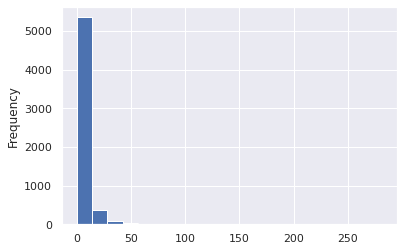

In [ ]:
data_life.frequency.plot(kind='hist', bins=20)

one_time_buyers = sum(data_life.frequency == 0)/float(len(data_life))*100
print("Percentage of one time buyers:", one_time_buyers)

In [ ]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data_life.frequency, data_life.recency, data_life['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5887 subjects, a: 0.14, alpha: 50.07, b: 1.99, r: 0.68>


/usr/local/lib/python3.7/dist-packages/lifetimes/fitters/beta_geo_fitter.py:256: RuntimeWarning: overflow encountered in double_scalars
  denominator = 1 + (x > 0) * (a / (b + x - 1)) * ((alpha + T) / (alpha + recency)) ** (r + x)


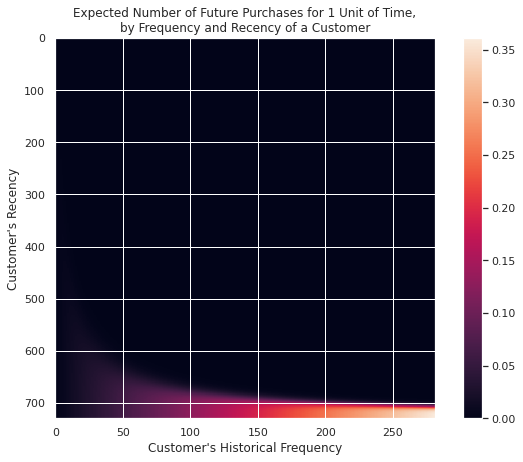

In [ ]:
fig = plt.figure(figsize=(10,7))
plot_frequency_recency_matrix(bgf)

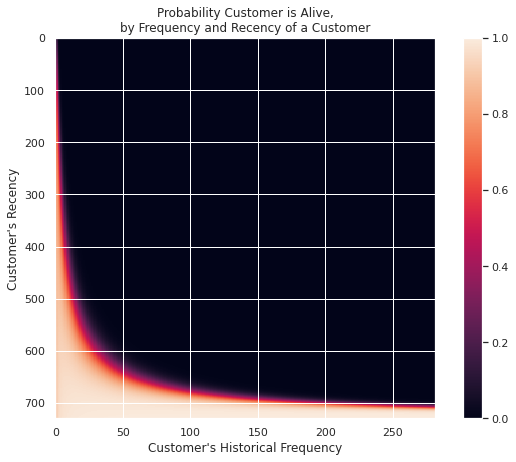

In [ ]:
fig = plt.figure(figsize=(10,7))
plot_probability_alive_matrix(bgf)

In [ ]:
data_life['pred_num_txn'] = bgf.conditional_expected_number_of_purchases_up_to_time(15, data_life.frequency, data_life.recency, data_life['T'])
data_life.sort_values(by='pred_num_txn', ascending=False).reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_txn
0,14911.0,281.0,728.0,729.0,1132.238007,5.412117e+00
1,12748.0,204.0,725.0,725.0,307.269706,3.953031e+00
2,15311.0,195.0,729.0,729.0,590.962103,3.759712e+00
3,17841.0,190.0,727.0,728.0,370.411211,3.667521e+00
4,14606.0,178.0,727.0,728.0,172.005674,3.436544e+00
...,...,...,...,...,...,...
5882,16754.0,20.0,269.0,641.0,3802.518000,7.640578e-06
5883,13446.0,17.0,243.0,663.0,212.572353,7.052174e-06
5884,15633.0,15.0,184.0,693.0,268.888000,4.881160e-07
5885,12835.0,35.0,310.0,728.0,153.436857,2.013840e-10


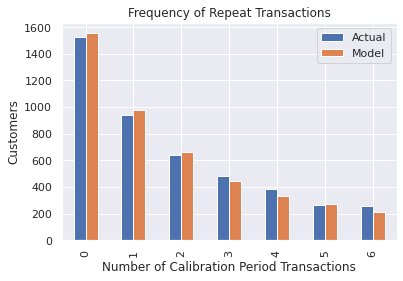

In [ ]:
plot_period_transactions(bgf)

In [ ]:
data_life.corr()

,frequency,recency,T,monetary_value,pred_num_txn
frequency,1.000000,0.514831,0.309839,0.041620,0.897177
recency,0.514831,1.000000,0.623989,0.065764,0.389500
T,0.309839,0.623989,1.000000,0.031258,0.018371
monetary_value,0.041620,0.065764,0.031258,1.000000,0.036443
pred_num_txn,0.897177,0.389500,0.018371,0.036443,1.000000


In [ ]:
shortlisted_customers = data_life[data_life.frequency >0]
shortlisted_customers.reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_txn
0,12346.0,10.0,400.0,725.0,15508.760000,0.039200
1,12347.0,7.0,402.0,404.0,717.398571,0.248461
2,12348.0,4.0,363.0,438.0,449.310000,0.135064
3,12349.0,3.0,571.0,589.0,1120.056667,0.082884
4,12352.0,8.0,356.0,392.0,458.340000,0.284366
...,...,...,...,...,...,...
4356,18282.0,2.0,119.0,126.0,39.645000,0.215418
4357,18283.0,18.0,655.0,658.0,146.405556,0.391900
4358,18284.0,1.0,2.0,431.0,25.000000,0.013207
4359,18286.0,2.0,247.0,723.0,470.740000,0.032184


In [ ]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers.frequency, shortlisted_customers.monetary_value)
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4361 subjects, p: 1.19, q: 3.82, v: 848.22>


In [ ]:
ggf.conditional_expected_average_profit(data_life.frequency,data_life.monetary_value)

Customer ID
12346.0    12598.705760
12347.0      625.992125
12348.0      414.835443
12349.0      782.646046
12350.0      356.825058
               ...     
18283.0      170.952414
18284.0      258.568535
18285.0      356.825058
18286.0      408.875119
18287.0      536.739836
Length: 5887, dtype: float64

In [ ]:
data_life['txn_value'] = ggf.conditional_expected_average_profit(data_life.frequency, data_life.monetary_value)
data_life.reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_txn,txn_value
0,12346.0,10.0,400.0,725.0,15508.760000,0.039200,12598.705760
1,12347.0,7.0,402.0,404.0,717.398571,0.248461,625.992125
2,12348.0,4.0,363.0,438.0,449.310000,0.135064,414.835443
3,12349.0,3.0,571.0,589.0,1120.056667,0.082884,782.646046
4,12350.0,0.0,0.0,310.0,0.000000,0.028086,356.825058
...,...,...,...,...,...,...,...
5882,18283.0,18.0,655.0,658.0,146.405556,0.391900,170.952414
5883,18284.0,1.0,2.0,431.0,25.000000,0.013207,258.568535
5884,18285.0,0.0,0.0,660.0,0.000000,0.014258,356.825058
5885,18286.0,2.0,247.0,723.0,470.740000,0.032184,408.875119


In [ ]:
data_life['Cust_life_value'] = round(ggf.customer_lifetime_value(bgf, data_life.frequency, data_life.recency, 
                                                      data_life['T'], data_life.monetary_value, time=12,
                                                     discount_rate=0.01), 2)

data_life.drop(data_life.iloc[:, 0:6], inplace=True, axis=1)

data_life.sort_values(by='Cust_life_value', ascending=False).head(10).reset_index()

,Customer ID,Cust_life_value
0,18102.0,241886.36
1,14646.0,220079.83
2,17450.0,139850.96
3,14156.0,137138.62
4,14096.0,134281.45
5,14911.0,133554.67
6,16446.0,133217.00
7,13694.0,76945.13
8,12415.0,74941.17
9,17511.0,70502.77
